In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import dedalus.public as d3 #wow, I just had to call it dedalus.public
# Had been writing dedalus3 and assuming there were actual errors with jupyter notebook launch
# since it always makes so many complaints
# Well now I'm just going to ignore the remaining jupyter notebook weirdness

In [177]:
df = h5py.File("DataFolders/NoParity(Run14)/checkpoints2/checkpoints2_s2.h5",'r')

In [178]:
df_fields = h5py.File("DataFolders/NoParity(Run14)/fields_two/fields_two_s2.h5",'r')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'DataFolders/NoParity(Run14)/fields_two/fields_two_s2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [169]:
lnrho = df['tasks/lnrho'][:]

In [170]:
rho_fields = df_fields['tasks/rho'][:]

In [171]:
df['tasks'].keys()

<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [172]:
df_fields['tasks'].keys()

<KeysViewHDF5 ['B', 'T', 'j', 'rho', 'v']>

In [173]:
rho = np.exp(lnrho)

In [174]:
rho.min()

0.0027286464031731675

In [175]:
lnrho.min()

-5.903949615759637

In [176]:
lnrho.max()

1.0734830191216405

In [14]:
rho_fields.min()

nan

In [179]:
df['scales/sim_time'][:]

array([0.        , 0.10063051, 0.200505  , 0.30033498, 0.40016966,
       0.50050084, 0.60010776, 0.70000964, 0.80041607, 0.90001465,
       1.00006021, 1.10000464, 1.20000861])

In [180]:
df_fields['scales/sim_time'][:]

array([0.        , 0.10063051, 0.200505  , 0.30033498, 0.40016966,
       0.50050084, 0.60010776, 0.70000964, 0.80041607, 0.90001465,
       1.00006021, 1.10000464, 1.20000861])

In [16]:
df['scales/iteration'][:]

array([   0,  175,  309,  446,  604,  778,  963, 1161, 1360, 1593])

In [17]:
df_fields['scales/iteration'][:]

array([   0,  175,  309,  446,  604,  778,  963, 1161, 1360, 1593, 1920,
       2927, 7810])

In [18]:
#with "h5py.file()" as file:
#    file.(whatever)
#    data = file['tasks/...'']
# last line in with grouping closes file

In [19]:
# Some toying around to figure out what x and xVal are, and r - skip this box if you're actually working on visualization.
# I just find this to be a handy reference for what various relevant spatial objects look like.

r = 1
length = 10
nx = 32 #formerly 32 x 32 x 160? Current plan is 64 x 64 x 320 or 640
ny = 32
nz = 160
mesh = None
coords = d3.CartesianCoordinates('x', 'y','z')
dist = d3.Distributor(coords, dtype=np.float64, mesh = mesh)
xbasis = d3.RealFourier(coords['x'], size=nx, bounds=(-r, r))
ybasis = d3.RealFourier(coords['y'], size=ny, bounds=(-r, r))
zbasis = d3.RealFourier(coords['z'], size=nz, bounds=(0, length))
x,y,z = dist.local_grids(xbasis,ybasis,zbasis)

p = 0
radmax = 0
# print(x) # prints triple array with single list singleton lists of -1 to  0.9375, 32 elts
# print(z) # similar, 160 elts, from 0 to 9.9375
# print(xbasis)
# print([[i,0,0] for i in range(x.shape[0])]) # prints list of [0,0,0] thru to [31,0,0]
#print(x.shape[0], x.shape[1], x.shape[2]) #prints 32, 1, 1
# print(z.shape[0], z.shape[1], z.shape[2]) #prints 1, 1, 160
# print(x[-1,0,0])
# print(type(x)) # class 'numpy.ndarray' (3D)
# print(x)
# print(type([1,0,0])) # class list (duh)
# print(x[1,0,0]) #prints -0.9375 - must be 
#y = np.ndarray
#y = [[[0]],[[1]],[[2]]] # not how instantiating a numpy array works
# print(y)
#y = x
#print(x)
# print("y mult is", y[1,0,0])
# print("x mult is", x[1,0,0])
#print(x)
#print(y)
#print(z)
for i in range(x.shape[0]):
    xVal = x[i,0,0]
    print("x is", x)
    print("xval is", xVal) # oh so this val thing just takes the specific value
    # (i.e. the ith entry and only the first component) from the 3D numpy array, but the set of
    # values are the same between x and xval
    for j in range(y.shape[1]):
        yVal = y[0,j,0]
        # print("yVal is", yVal)
        for k in range(z.shape[2]):
            zVal = z[0,0,k]
            rad = np.sqrt(xVal**2 + yVal**2)
            p += 1
            if p % 1000 == 0:
                # print("xVal is", xVal)
                # print("x is", x)
                # print("[i,0,0] is", [i,0,0])
                # print("yVal is", yVal)
                # print("zVal is", zVal) # single number from 0 to 10
                # print("z is", z) # full 160 list
                #print("rad is", rad)
                print("radmax is", radmax)
            radmax = max(rad, radmax)

x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
xval is -1.0
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.

x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
xval is 0.3749999999999998
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.

In [120]:
Density = df['tasks/lnrho'][9,:,:,:]

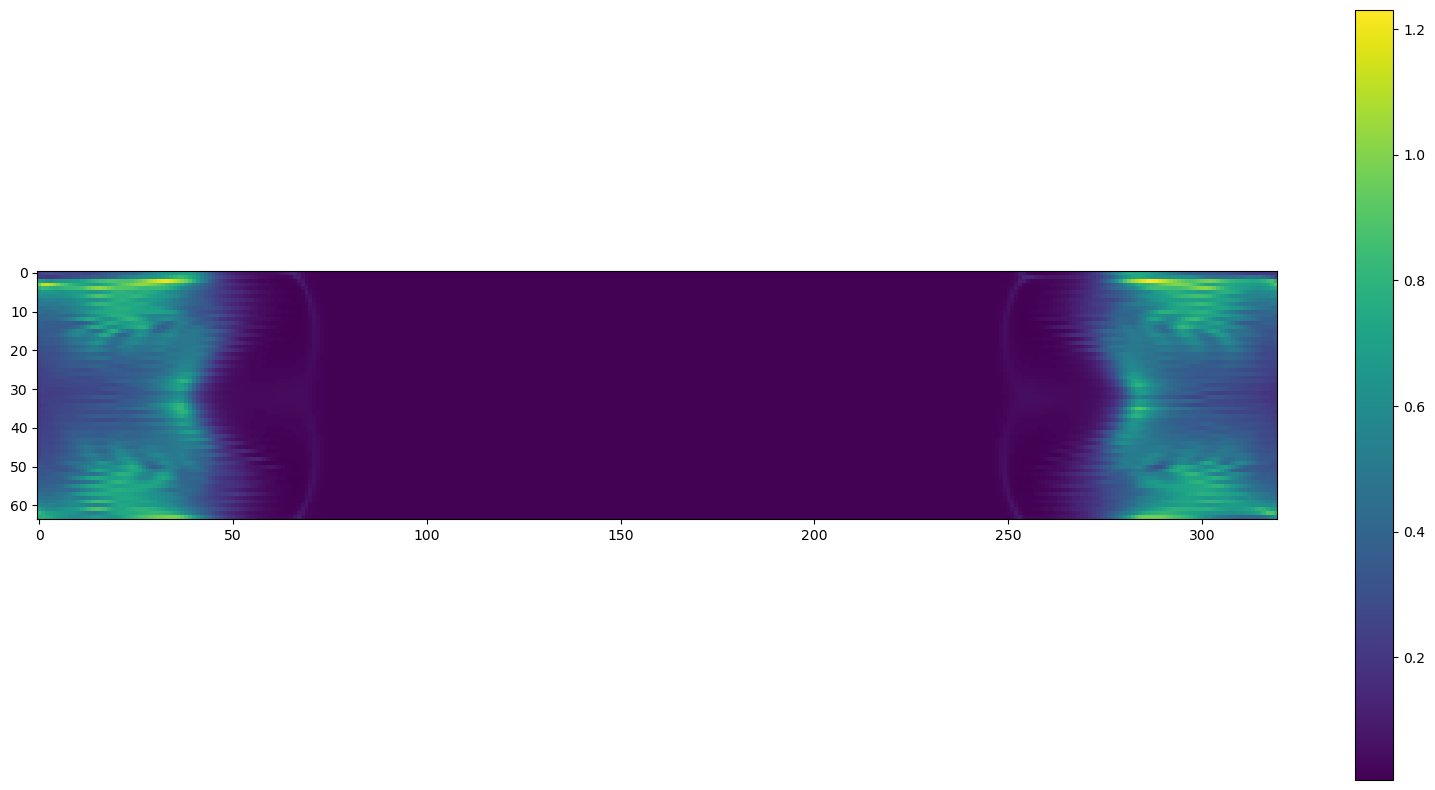

In [273]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(np.exp(Density[:,31,:])) #vmax = 0.01
plt.colorbar()

In [204]:
density_fields = df_fields['tasks/rho'][11,:,:,:]

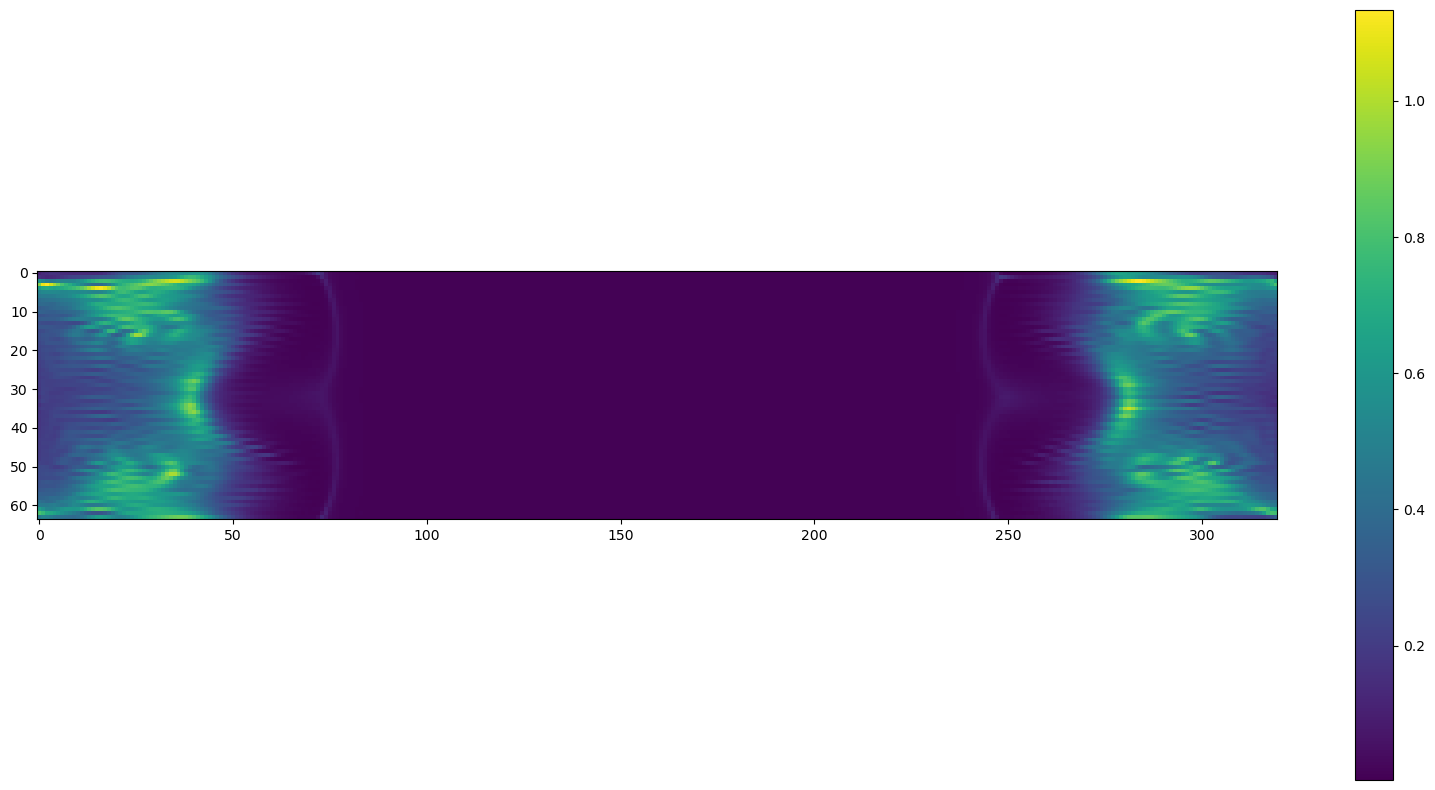

In [206]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(density_fields[:,31,:]) #vmax = 0.01
plt.colorbar()

In [216]:
Temp = df['tasks/T'][1,:,:,:]

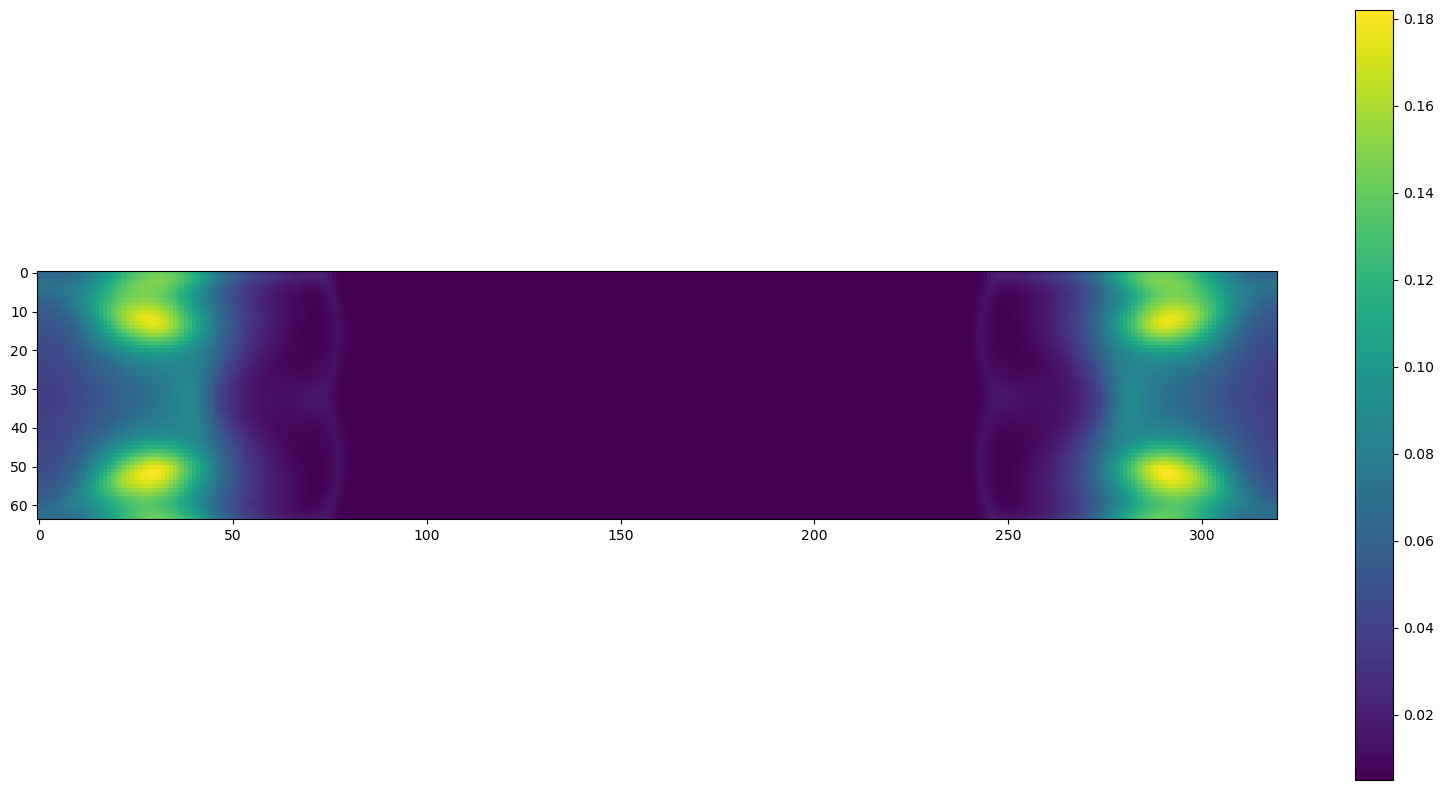

In [288]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(Temp[:,32,:]) #vmax = 0.01
plt.colorbar()

## np.exp(Density).min()

In [161]:
np.exp(Density).argmin() #turn this into 3D index - unravel, then slice in one of those directions to see plane where min is

1064962

In [162]:
T_fields = df_fields['tasks/T'][:]
T_fields.min()

nan

In [163]:
Temp.min()

0.004671963849374343

In [164]:
rho_fields.min()

nan

In [166]:
df.close()
df_fields.close()